In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Feature importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Insta Image

,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_image,amount
216,216,217132.0,2.10,4369.08,193.50,1.0,4454.545455
220,220,238183.0,3.00,7073.50,74.42,1.0,6363.636364
232,232,414572.0,1.39,5701.25,66.92,1.0,12147.058824
233,233,680959.0,3.53,23939.75,91.67,1.0,6363.636364
237,237,760520.0,5.47,41448.50,117.92,3.0,56417.910448


C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_image,amount
216,216,217132.0,2.10,4369.08,193.50,1.0,4454.545455
220,220,238183.0,3.00,7073.50,74.42,1.0,6363.636364
232,232,414572.0,1.39,5701.25,66.92,1.0,12147.058824
233,233,680959.0,3.53,23939.75,91.67,1.0,6363.636364
237,237,760520.0,5.47,41448.50,117.92,1.0,18805.970149


Predicted:  [17604.23304584]
coefficient:  [ 0.02010717  0.02186688 12.01702151]
intercept:  0.0


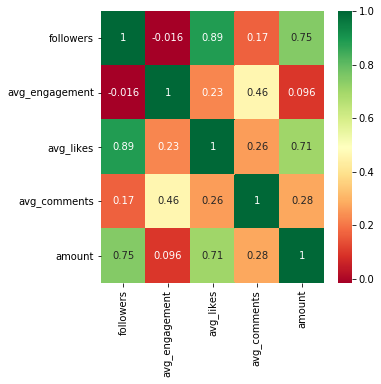

In [81]:
insta_image_df = pd.read_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Price_insta_image.csv')
insta_image_df = insta_image_df[insta_image_df.amount != 0]
display(insta_image_df.tail())

for i in insta_image_df.index:
    insta_image_df.amount.loc[i] = insta_image_df.amount.loc[i]/insta_image_df.insta_image.loc[i]
    insta_image_df.insta_image.loc[i] =1
display(insta_image_df.tail())

 ## Prelim Check | avg_engagement is not necessary

insta_clean_df = insta_image_df[["followers","avg_engagement","avg_likes","avg_comments","amount"]]
#Heatmap
corrmat = insta_clean_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(insta_clean_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

X = insta_clean_df[["followers","avg_likes","avg_comments"]]
y = insta_clean_df['amount'].values

model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

#Manual Check
influ_followers = 760520
engg = 3.5
likes = 41448
comments = 117
print("Predicted: ",model2.predict([[influ_followers,likes,comments]]))

# Coefficients
print("coefficient: ",model2.coef_)
print("intercept: ",model2.intercept_)

# Insta Story

,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_story,amount
236,236,760520.0,5.47,41448.5,117.92,1.0,18571.428571
237,237,760520.0,5.47,41448.5,117.92,4.0,42985.074627
238,238,760520.0,5.47,41448.5,117.92,1.0,15714.285714
239,239,763901.0,3.00,22846.5,66.42,1.0,22857.142857
240,240,915864.0,8.00,72907.0,368.33,1.0,634.857143


C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_story,amount
0,0,3111.0,1.79,47.50,8.08,1.0,109.090909
1,1,3325.0,18.01,594.42,4.50,1.0,307.692308
2,2,3897.0,6.86,244.58,22.92,1.0,109.090909
3,3,4062.0,2.40,95.08,2.50,1.0,109.090909
4,4,4207.0,3.04,121.00,6.92,1.0,222.222222
...,...,...,...,...,...,...,...
236,236,760520.0,5.47,41448.50,117.92,1.0,18571.428571
237,237,760520.0,5.47,41448.50,117.92,1.0,10746.268657
238,238,760520.0,5.47,41448.50,117.92,1.0,15714.285714
239,239,763901.0,3.00,22846.50,66.42,1.0,22857.142857


Predicted:  [12689.35571421]
coefficient:  [0.01645409 2.01940688]
intercept:  0.0


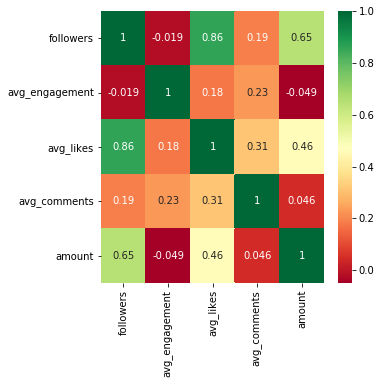

In [97]:
insta_story_df = pd.read_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Price_insta_story.csv')
insta_story_df = insta_story_df[insta_story_df.amount != 0]
display(insta_story_df.tail())

# Mandatory Second Run only
for i in insta_story_df.index:
    insta_story_df.amount.loc[i] = insta_story_df.amount.loc[i]/insta_story_df.insta_story.loc[i]
    insta_story_df.insta_story.loc[i] =1
display(insta_story_df)

insta_clean_df = insta_story_df[["followers","avg_engagement","avg_likes","avg_comments","amount"]]
#Heatmap
corrmat = insta_clean_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(insta_clean_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

X = insta_clean_df[["followers","avg_comments"]]
# X = insta_clean_df[["followers","avg_likes"]]
y = insta_clean_df['amount'].values

model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

#Manual Check
influ_followers = 760520
engg = 4
likes = 42448
comments = 87
print("Predicted: ",model2.predict([[influ_followers,comments]]))

# Coefficients
print("coefficient: ",model2.coef_)
print("intercept: ",model2.intercept_)

# Insta Video

,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_video,amount
1,1,3325.0,18.01,594.42,4.50,1.0,769.230769
4,4,4207.0,3.04,121.00,6.92,1.0,555.555556
5,5,4409.0,3.57,129.17,28.17,1.0,176.470588
10,10,5647.0,1.19,59.67,7.75,3.0,4477.611940
11,11,5885.0,2.73,127.08,33.58,1.0,176.470588
...,...,...,...,...,...,...,...
237,237,760520.0,5.47,41448.50,117.92,3.0,80597.014925
238,238,760520.0,5.47,41448.50,117.92,1.0,39285.714286
239,239,763901.0,3.00,22846.50,66.42,1.0,57142.857143
240,240,915864.0,8.00,72907.00,368.33,1.0,1587.142857


C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_video,amount
1,1,3325.0,18.01,594.42,4.50,1.0,769.230769
4,4,4207.0,3.04,121.00,6.92,1.0,555.555556
5,5,4409.0,3.57,129.17,28.17,1.0,176.470588
10,10,5647.0,1.19,59.67,7.75,1.0,1492.537313
11,11,5885.0,2.73,127.08,33.58,1.0,176.470588
...,...,...,...,...,...,...,...
237,237,760520.0,5.47,41448.50,117.92,1.0,26865.671642
238,238,760520.0,5.47,41448.50,117.92,1.0,39285.714286
239,239,763901.0,3.00,22846.50,66.42,1.0,57142.857143
240,240,915864.0,8.00,72907.00,368.33,1.0,1587.142857


Predicted:  [206260.32219628]
coefficient:  [0.01537128 0.52749712]
intercept:  0.0


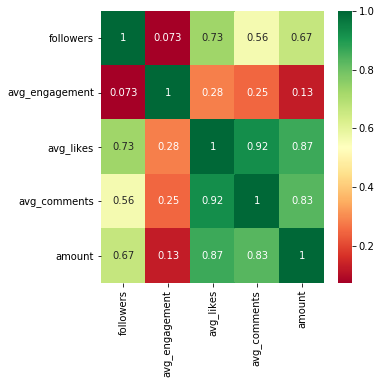

In [80]:
insta_video_df = pd.read_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Price_insta_video.csv')
insta_video_df = insta_video_df[insta_video_df.amount != 0]
display(insta_video_df)

# Mandatory Second Run only
for i in insta_video_df.index:
    insta_video_df.amount.loc[i] = insta_video_df.amount.loc[i]/insta_video_df.insta_video.loc[i]
    insta_video_df.insta_video.loc[i] =1
display(insta_video_df)

insta_clean_df = pd.DataFrame()
insta_clean_df = insta_video_df[["followers","avg_engagement","avg_likes","avg_comments","amount"]]
#Heatmap
corrmat = insta_clean_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(insta_clean_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# X = insta_clean_df[["followers","avg_engagement","avg_likes","avg_comments"]]
X = insta_clean_df[["followers","avg_likes"]]
y = insta_clean_df['amount'].values

model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

#Manual Check
influ_followers = 1311974
engg = 3.5
likes = 352786
comments = 320
# print("Predicted: ",model2.predict([[influ_followers,engg,likes,comments]]))
print("Predicted: ",model2.predict([[influ_followers,likes]]))

# Coefficients
print("coefficient: ",model2.coef_)
print("intercept: ",model2.intercept_)

# Insta Reel

,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_reel,amount
93,93,21943.0,9.24,1607.92,419.92,1.0,4766.666667
111,111,26394.0,18.47,4803.42,72.67,1.0,1320.000000
137,137,43152.0,5.48,2326.17,37.83,1.0,3666.666667
141,141,44590.0,11.88,5192.58,103.58,1.0,4400.000000
151,151,54334.0,7.73,4040.50,157.75,1.0,7333.333333
203,203,145811.0,47.27,68580.17,344.92,1.0,26190.476190
214,214,203728.0,16.68,33336.67,650.25,1.0,4190.476190
217,217,217295.0,35.27,75977.33,663.67,1.0,15714.285714
228,228,313048.0,10.69,32955.83,518.08,1.0,6285.714286
235,235,680992.0,8.11,54715.25,534.33,1.0,13095.238095


C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_reel,amount
214,214,203728.0,16.68,33336.67,650.25,1.0,4190.476190
217,217,217295.0,35.27,75977.33,663.67,1.0,15714.285714
228,228,313048.0,10.69,32955.83,518.08,1.0,6285.714286
235,235,680992.0,8.11,54715.25,534.33,1.0,13095.238095
241,241,1311974.0,27.23,352786.17,4411.17,1.0,261904.761905


Predicted:  [1513.86485446]
coefficient:  [0.15138649]
intercept:  0.0


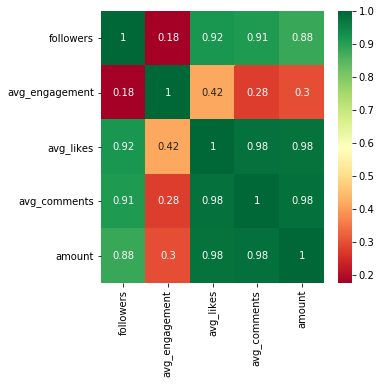

In [52]:
insta_reel_df = pd.read_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Price_insta_reel.csv')
insta_reel_df = insta_reel_df[insta_reel_df.amount != 0]
display(insta_reel_df)

# Mandatory Second Run only
for i in insta_reel_df.index:
    insta_reel_df.amount.loc[i] = insta_reel_df.amount.loc[i]/insta_reel_df.insta_reel.loc[i]
    insta_reel_df.insta_reel.loc[i] =1
display(insta_reel_df.tail())

insta_clean_df = pd.DataFrame()
insta_clean_df = insta_reel_df[["followers","avg_engagement","avg_likes","avg_comments","amount"]]
#Heatmap
corrmat = insta_clean_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(insta_clean_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

X = insta_clean_df[["followers"]]
y = insta_clean_df['amount'].values

model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

#Manual Check
influ_followers = 10000
engg = 3.5
likes = 1250
comments = 29
print("Predicted: ",model2.predict([[influ_followers]]))

# Coefficients
print("coefficient: ",model2.coef_)
print("intercept: ",model2.intercept_)

# END of Coefficient gathering

## Making of Formula

In [84]:
def price_3(followers,avg_likes,avg_comments,story,image,video,reel):
    story_rate = (0.025025*followers)+(-0.14988402*avg_likes)
    image_rate = (0.02010717*followers)+(0.02186688*avg_likes)+(12.0170215*avg_comments)
    video_rate = (0.01537128*followers)+(0.52749712*avg_likes)
    reel_rate = 0.15138649*followers
    total_cost = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel
    return total_cost

In [2]:
def price_4(followers,avg_likes,avg_comments,story,image,video,reel):
    story_rate = (0.01645409*followers)+(2.01940688*avg_comments)
    image_rate = (0.02010717*followers)+(12.0170215*avg_comments)
    video_rate = (0.01537128*followers)+(0.52749712*avg_likes)
    reel_rate = 0.15138649*followers
    total_cost = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel
    return total_cost

### Testing formula

In [86]:
insta_data = pd.read_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\InstagramData.csv')
insta_data.head()
insta_pred3 = pd.DataFrame(columns = ["followers","avg_likes","avg_comments","insta_image","insta_story","insta_video","insta_reel","amount","pred_amount"])
for i in insta_data.index:
    push_dict= {"followers":insta_data.followers.loc[i],
                "avg_likes":insta_data.avg_likes.loc[i],
                "avg_comments":insta_data.avg_comments.loc[i],
                "insta_image":insta_data.insta_image.loc[i],
                "insta_story":insta_data.insta_story.loc[i],
                "insta_video":insta_data.insta_video.loc[i],
                "insta_reel":insta_data.insta_reel.loc[i],
                "amount":insta_data.amount.loc[i],
                "pred_amount":price_3(insta_data.followers.loc[i],insta_data.avg_likes.loc[i],insta_data.avg_comments.loc[i],insta_data.insta_story.loc[i],insta_data.insta_image.loc[i],insta_data.insta_video.loc[i],insta_data.insta_reel.loc[i])
    }
    insta_pred3 = insta_pred3.append(push_dict,ignore_index=True)
display(insta_pred3)
insta_pred3.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Insta_pred_prices_3.csv')

,followers,avg_likes,avg_comments,insta_image,insta_story,insta_video,insta_reel,amount,pred_amount
0,3111.0,47.50,8.08,1.0,1.0,0.0,0.0,300.0,231.422900
1,3325.0,594.42,4.50,0.0,4.0,1.0,0.0,2000.0,341.120607
2,3897.0,244.58,22.92,1.0,1.0,0.0,0.0,300.0,419.999767
3,4062.0,95.08,2.50,1.0,1.0,0.0,0.0,300.0,201.197559
4,4207.0,121.00,6.92,0.0,2.0,1.0,0.0,1000.0,302.782544
...,...,...,...,...,...,...,...,...,...
237,760520.0,41448.50,117.92,3.0,4.0,3.0,0.0,180000.0,204786.475958
238,760520.0,41448.50,117.92,0.0,1.0,1.0,0.0,55000.0,46373.675441
239,763901.0,22846.50,66.42,0.0,1.0,1.0,0.0,80000.0,39485.896377
240,915864.0,72907.00,368.33,0.0,1.0,1.0,0.0,2222.0,64528.136868


## Image Test

In [88]:
display(insta_image_df)
insta_pred4 = pd.DataFrame(columns = ["followers","avg_likes","avg_comments","insta_image","amount","pred_amount"])
for i in insta_image_df.index:
    push_dict= {"followers":insta_image_df.followers.loc[i],
                "avg_likes":insta_image_df.avg_likes.loc[i],
                "avg_comments":insta_image_df.avg_comments.loc[i],
                "insta_image":insta_image_df.insta_image.loc[i],
                "amount":insta_image_df.amount.loc[i],
                "pred_amount":price_3(insta_image_df.followers.loc[i],insta_image_df.avg_likes.loc[i],insta_image_df.avg_comments.loc[i],0,insta_image_df.insta_image.loc[i],0,0)
    }
    insta_pred4 = insta_pred4.append(push_dict,ignore_index=True)
display(insta_pred4)
insta_pred4.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\FormulaTest_image.csv')

,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_image,amount
0,0,3111.0,1.79,47.50,8.08,1.0,190.909091
2,2,3897.0,6.86,244.58,22.92,1.0,190.909091
3,3,4062.0,2.40,95.08,2.50,1.0,190.909091
5,5,4409.0,3.57,129.17,28.17,1.0,123.529412
6,6,4687.0,5.57,214.17,46.75,1.0,190.909091
...,...,...,...,...,...,...,...
216,216,217132.0,2.10,4369.08,193.50,1.0,4454.545455
220,220,238183.0,3.00,7073.50,74.42,1.0,6363.636364
232,232,414572.0,1.39,5701.25,66.92,1.0,12147.058824
233,233,680959.0,3.53,23939.75,91.67,1.0,6363.636364


,followers,avg_likes,avg_comments,insta_image,amount,pred_amount
0,3111.0,47.50,8.08,1.0,190.909091,160.689616
1,3897.0,244.58,22.92,1.0,190.909091,359.135976
2,4062.0,95.08,2.50,1.0,190.909091,113.796981
3,4409.0,129.17,28.17,1.0,123.529412,429.996553
4,4687.0,214.17,46.75,1.0,190.909091,660.721291
...,...,...,...,...,...,...
96,217132.0,4369.08,193.50,1.0,4454.545455,6786.741845
97,238183.0,7073.50,74.42,1.0,6363.636364,5838.168188
98,414572.0,5701.25,66.92,1.0,12147.058824,9264.717310
99,680959.0,23939.75,91.67,1.0,6363.636364,15317.246377


## Story Test

In [101]:
display(insta_story_df)
insta_pred4 = pd.DataFrame(columns = ["followers","avg_likes","avg_comments","insta_story","amount","pred_amount"])
for i in insta_story_df.index:
    push_dict= {"followers":insta_story_df.followers.loc[i],
                "avg_likes":insta_story_df.avg_likes.loc[i],
                "avg_comments":insta_story_df.avg_comments.loc[i],
                "insta_story":insta_story_df.insta_story.loc[i],
                "amount":insta_story_df.amount.loc[i],
                "pred_amount":price_4(insta_story_df.followers.loc[i],insta_story_df.avg_likes.loc[i],insta_story_df.avg_comments.loc[i],insta_story_df.insta_story.loc[i],0,0,0)
    }
    insta_pred4 = insta_pred4.append(push_dict,ignore_index=True)
display(insta_pred4)
insta_pred4.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\FormulaTest_story.csv')

,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_story,amount
0,0,3111.0,1.79,47.50,8.08,1.0,109.090909
1,1,3325.0,18.01,594.42,4.50,1.0,307.692308
2,2,3897.0,6.86,244.58,22.92,1.0,109.090909
3,3,4062.0,2.40,95.08,2.50,1.0,109.090909
4,4,4207.0,3.04,121.00,6.92,1.0,222.222222
...,...,...,...,...,...,...,...
236,236,760520.0,5.47,41448.50,117.92,1.0,18571.428571
237,237,760520.0,5.47,41448.50,117.92,1.0,10746.268657
238,238,760520.0,5.47,41448.50,117.92,1.0,15714.285714
239,239,763901.0,3.00,22846.50,66.42,1.0,22857.142857


,followers,avg_likes,avg_comments,insta_story,amount,pred_amount
0,3111.0,47.50,8.08,1.0,109.090909,67.505482
1,3325.0,594.42,4.50,1.0,307.692308,63.797180
2,3897.0,244.58,22.92,1.0,109.090909,110.406394
3,4062.0,95.08,2.50,1.0,109.090909,71.885031
4,4207.0,121.00,6.92,1.0,222.222222,83.196652
...,...,...,...,...,...,...
187,760520.0,41448.50,117.92,1.0,18571.428571,12751.792986
188,760520.0,41448.50,117.92,1.0,10746.268657,12751.792986
189,760520.0,41448.50,117.92,1.0,15714.285714,12751.792986
190,763901.0,22846.50,66.42,1.0,22857.142857,12703.424810


## Video Test

In [92]:
display(insta_video_df)
insta_pred4 = pd.DataFrame(columns = ["followers","avg_likes","avg_comments","insta_video","amount","pred_amount"])
for i in insta_video_df.index:
    push_dict= {"followers":insta_video_df.followers.loc[i],
                "avg_likes":insta_video_df.avg_likes.loc[i],
                "avg_comments":insta_video_df.avg_comments.loc[i],
                "insta_video":insta_video_df.insta_video.loc[i],
                "amount":insta_video_df.amount.loc[i],
                "pred_amount":price_3(insta_video_df.followers.loc[i],insta_video_df.avg_likes.loc[i],insta_video_df.avg_comments.loc[i],0,0,insta_video_df.insta_video.loc[i],0)
    }
    insta_pred4 = insta_pred4.append(push_dict,ignore_index=True)
display(insta_pred4)
insta_pred4.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\FormulaTest_video.csv')

,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_video,amount
1,1,3325.0,18.01,594.42,4.50,1.0,769.230769
4,4,4207.0,3.04,121.00,6.92,1.0,555.555556
5,5,4409.0,3.57,129.17,28.17,1.0,176.470588
10,10,5647.0,1.19,59.67,7.75,1.0,1492.537313
11,11,5885.0,2.73,127.08,33.58,1.0,176.470588
...,...,...,...,...,...,...,...
237,237,760520.0,5.47,41448.50,117.92,1.0,26865.671642
238,238,760520.0,5.47,41448.50,117.92,1.0,39285.714286
239,239,763901.0,3.00,22846.50,66.42,1.0,57142.857143
240,240,915864.0,8.00,72907.00,368.33,1.0,1587.142857


,followers,avg_likes,avg_comments,insta_video,amount,pred_amount
0,3325.0,594.42,4.50,1.0,769.230769,364.664344
1,4207.0,121.00,6.92,1.0,555.555556,128.494126
2,4409.0,129.17,28.17,1.0,176.470588,135.908777
3,5647.0,59.67,7.75,1.0,1492.537313,118.277371
4,5885.0,127.08,33.58,1.0,176.470588,157.494317
...,...,...,...,...,...,...
167,760520.0,41448.50,117.92,1.0,26865.671642,33554.130244
168,760520.0,41448.50,117.92,1.0,39285.714286,33554.130244
169,763901.0,22846.50,66.42,1.0,57142.857143,23793.599115
170,915864.0,72907.00,368.33,1.0,1587.142857,52536.234514


## Reel Test

In [93]:
display(insta_reel_df)
insta_pred4 = pd.DataFrame(columns = ["followers","avg_likes","avg_comments","insta_reel","amount","pred_amount"])
for i in insta_reel_df.index:
    push_dict= {"followers":insta_reel_df.followers.loc[i],
                "avg_likes":insta_reel_df.avg_likes.loc[i],
                "avg_comments":insta_reel_df.avg_comments.loc[i],
                "insta_reel":insta_reel_df.insta_reel.loc[i],
                "amount":insta_reel_df.amount.loc[i],
                "pred_amount":price_3(insta_reel_df.followers.loc[i],insta_reel_df.avg_likes.loc[i],insta_reel_df.avg_comments.loc[i],0,0,0,insta_reel_df.insta_reel.loc[i])
    }
    insta_pred4 = insta_pred4.append(push_dict,ignore_index=True)
display(insta_pred4)
insta_pred4.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\FormulaTest_reel.csv')

,Unnamed: 0,followers,avg_engagement,avg_likes,avg_comments,insta_reel,amount
93,93,21943.0,9.24,1607.92,419.92,1.0,4766.666667
111,111,26394.0,18.47,4803.42,72.67,1.0,1320.000000
137,137,43152.0,5.48,2326.17,37.83,1.0,3666.666667
141,141,44590.0,11.88,5192.58,103.58,1.0,4400.000000
151,151,54334.0,7.73,4040.50,157.75,1.0,7333.333333
203,203,145811.0,47.27,68580.17,344.92,1.0,26190.476190
214,214,203728.0,16.68,33336.67,650.25,1.0,4190.476190
217,217,217295.0,35.27,75977.33,663.67,1.0,15714.285714
228,228,313048.0,10.69,32955.83,518.08,1.0,6285.714286
235,235,680992.0,8.11,54715.25,534.33,1.0,13095.238095


,followers,avg_likes,avg_comments,insta_reel,amount,pred_amount
0,21943.0,1607.92,419.92,1.0,4766.666667,3321.873750
1,26394.0,4803.42,72.67,1.0,1320.000000,3995.695017
2,43152.0,2326.17,37.83,1.0,3666.666667,6532.629816
3,44590.0,5192.58,103.58,1.0,4400.000000,6750.323589
4,54334.0,4040.50,157.75,1.0,7333.333333,8225.433548
5,145811.0,68580.17,344.92,1.0,26190.476190,22073.815493
6,203728.0,33336.67,650.25,1.0,4190.476190,30841.666835
7,217295.0,75977.33,663.67,1.0,15714.285714,32895.527345
8,313048.0,32955.83,518.08,1.0,6285.714286,47391.237922
9,680992.0,54715.25,534.33,1.0,13095.238095,103092.988598


## Test with all post type

In [104]:
insta_data = pd.read_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\InstagramData.csv')
insta_data.head()
insta_pred2 = pd.DataFrame(columns = ["followers","avg_likes","avg_comments","insta_image","insta_story","insta_video","insta_reel","amount","pred_amount"])
for i in insta_data.index:
    push_dict= {"followers":insta_data.followers.loc[i],
                "avg_likes":insta_data.avg_likes.loc[i],
                "avg_comments":insta_data.avg_comments.loc[i],
                "insta_image":insta_data.insta_image.loc[i],
                "insta_story":insta_data.insta_story.loc[i],
                "insta_video":insta_data.insta_video.loc[i],
                "insta_reel":insta_data.insta_reel.loc[i],
                "amount":insta_data.amount.loc[i],
                "pred_amount":price_4(insta_data.followers.loc[i],insta_data.avg_likes.loc[i],insta_data.avg_comments.loc[i],insta_data.insta_story.loc[i],insta_data.insta_image.loc[i],insta_data.insta_video.loc[i],insta_data.insta_reel.loc[i])
    }
    insta_pred2 = insta_pred2.append(push_dict,ignore_index=True)
display(insta_pred2)
insta_pred2.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Insta_pred_prices_4.csv')

,followers,avg_likes,avg_comments,insta_image,insta_story,insta_video,insta_reel,amount,pred_amount
0,3111.0,47.50,8.08,1.0,1.0,0.0,0.0,300.0,227.156421
1,3325.0,594.42,4.50,0.0,4.0,1.0,0.0,2000.0,619.853065
2,3897.0,244.58,22.92,1.0,1.0,0.0,0.0,300.0,464.194169
3,4062.0,95.08,2.50,1.0,1.0,0.0,0.0,300.0,183.602909
4,4207.0,121.00,6.92,0.0,2.0,1.0,0.0,1000.0,294.887431
...,...,...,...,...,...,...,...,...,...
237,760520.0,41448.50,117.92,3.0,4.0,3.0,0.0,180000.0,201796.418987
238,760520.0,41448.50,117.92,0.0,1.0,1.0,0.0,55000.0,46305.923230
239,763901.0,22846.50,66.42,0.0,1.0,1.0,0.0,80000.0,36497.023925
240,915864.0,72907.00,368.33,0.0,1.0,1.0,0.0,2222.0,68349.751334


In [3]:
print(price_4(7345,185,13,4,3,3,0))


2131.62270781